In [48]:
import os
import sys
from importlib import reload
# Add this path to sys.path
sys.path.append('/Users/federica/Dropbox/PostDoc/Projects/MKP5/ANALYSIS/')
import MDAnalysis as mda
import interactions
reload(interactions)
from  interactions import *

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = '/Volumes/fatpidg/MKP5/DRY/DRY_1us/'
prefix = 'dry_'
suffix = '_rep_0'
variants = ['C1_WT', 'NOC1_WT']
offset = 320




In [4]:

traj_dict = {}
for variant in variants:
    u = mda.Universe(path+prefix+variant+suffix+'.prmtop', path+prefix+variant+suffix+'.xtc', in_memory=True)

    lig_atoms = u.select_atoms('resname LIG')
    prot_atoms = u.select_atoms('protein')
    u.add_TopologyAttr("chainIDs")
    lig_atoms.atoms.chainIDs  = 'L'
    prot_atoms.atoms.chainIDs = "A"
    resids = u.select_atoms('all').residues.resids
    u.select_atoms('all').residues.resids = resids+offset
    traj_dict.update({variant:u})

In [8]:
%%time
import atexit
atexit.unregister(logging.shutdown)

savedir = '/Volumes/fatpidg/MKP5/DRY/DRY_1us/CACHEtuto/'

initial_frame = 0
final_frame = 1000
step=20


parameters = {'prot_interactions':  tuple(['protein', 'protein']),
              'prot_lig_interactions': tuple(['around 4.5 resname LIG', 'resname LIG']),
              }

for traj_k, traj_v in traj_dict.items():
   for key,selections in parameters.items():
        print(key, selections)

        selection1 = traj_v.select_atoms(selections[0])
        selection2 = traj_v.select_atoms(selections[1])
        if ('lig' in key) & (not (list(selection2) != [])):
            print('Skip protein-ligand interactions, no ligand found')
        else:

            hb_analysis = ParallelHydrogenBondAnalysis(traj_v, selection1, selection2, angle=(0,60), distance=3.6,
                                                initial_frame=initial_frame, final_frame=final_frame, step=step)

            hb_analysis.run()
            df_hb = pd.DataFrame(hb_analysis.results)
            if df_hb is not None:
                df_hb.to_pickle(savedir + f'{key}/hbond_'+traj_k+'.pkl')
            df_hb_count = hb_analysis.count_by_time()
            if df_hb_count is not None:
                df_hb_count.to_pickle(savedir + f'{key}/hbond_count_'+traj_k+'.pkl')

            pi_pi_analysis = ParallelPiPiStackingAnalysis(traj_v, selection1, selection2, distance=4.5, f2f_angle=(0, 60), e2f_angle=(60, 135), initial_frame=initial_frame,
                                                    final_frame=final_frame, step=step)
            pi_pi_analysis.run()
            df_pi_pi = pd.DataFrame(pi_pi_analysis.results)
            if df_pi_pi is not None:
                df_pi_pi.to_pickle(savedir + f'{key}/pi_pi_'+traj_k+'.pkl')

            df_pi_pi_count = pi_pi_analysis.count_by_time()
            if df_pi_pi_count is not None:
                df_pi_pi_count.to_pickle(savedir + f'{key}/pi_pi_count_'+traj_k+'.pkl')


            hphob_analysis = ParallelHydrophobicInteractionAnalysis(traj_v, selection1, selection2, distance=5.,
                                                initial_frame=initial_frame, final_frame=final_frame, step=step)

            hphob_analysis.run()
            df_hphob = pd.DataFrame(hphob_analysis.results)
            if df_hphob is not None:
                df_hphob.to_pickle(savedir + f'{key}/hphob_'+traj_k+'.pkl')
            df_hphob_count = hphob_analysis.count_by_time()
            if df_hphob_count is not None:
                df_hphob_count.to_pickle(savedir + f'{key}/hphob_count_'+traj_k+'.pkl')



prot_interactions ('protein', 'protein')


/usr/local/Caskroom/miniconda/base/envs/mdigestenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/usr/local/Caskroom/miniconda/base/envs/mdigestenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/federica/Dropbox/PostDoc/Projects/MKP5/ANALYSIS/interactions.py:55: RuntimeWarning: invalid value encountered in arccos
  angle_rad = np.arccos(dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2)))
/usr/local/Caskroom/miniconda/base/envs/mdigestenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/federica/Dropbox/PostDoc/Projects/MKP5/ANALYSIS/interactions.py:55: RuntimeWarning: invalid value encountered in arccos
  angle_rad = np.arc

prot_lig_interactions ('around 4.5 resname LIG', 'resname LIG')


/usr/local/Caskroom/miniconda/base/envs/mdigestenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/usr/local/Caskroom/miniconda/base/envs/mdigestenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/usr/local/Caskroom/miniconda/base/envs/mdigestenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/usr/local/Caskroom/miniconda/base/envs/mdigestenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/usr/local/Caskroom/miniconda/base/envs/mdigestenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'x

prot_interactions ('protein', 'protein')


/usr/local/Caskroom/miniconda/base/envs/mdigestenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/usr/local/Caskroom/miniconda/base/envs/mdigestenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/federica/Dropbox/PostDoc/Projects/MKP5/ANALYSIS/interactions.py:55: RuntimeWarning: invalid value encountered in arccos
  angle_rad = np.arccos(dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2)))
/usr/local/Caskroom/miniconda/base/envs/mdigestenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/federica/Dropbox/PostDoc/Projects/MKP5/ANALYSIS/interactions.py:55: RuntimeWarning: invalid value encountered in arccos
  angle_rad = np.arc

prot_lig_interactions ('around 4.5 resname LIG', 'resname LIG')
Skip protein-ligand interactions, no ligand found
CPU times: user 2min 14s, sys: 2min 39s, total: 4min 53s
Wall time: 10min 45s


In [11]:
import os
def merge_and_difference(df1, df2, on=['donor_resid', 'h_resid', 'acceptor_resid'], how='outer', suffixes=('_C1_WT', '_C1_Y435A'),
          label='difference'):

    df1 = df1.groupby(['donor_resid', 'acceptor_resid']).agg({'percentage': 'mean'}, axis=0).reset_index()
    df2 = df2.groupby(['donor_resid', 'acceptor_resid']).agg({'percentage': 'mean'}, axis=0).reset_index()
    print(df1, df2)
    # Create a list of columns to select
    cols = on + ['percentage' + suffixes[0], 'percentage' + suffixes[1], label]

    # Merge the DataFrames
    tmp = df1.merge(df2, on=on, how=how, suffixes=suffixes)

    # Calculate the difference and add it to the DataFrame
    tmp[label] = np.nansum([tmp['percentage' + suffixes[1]].values, -tmp['percentage' + suffixes[0]].values], axis=0)

    # Select and return the desired columns
    return tmp[cols]


In [20]:
import os
variants = ['C1_WT','NOC1_WT']
labels=['prot', 'prot_lig']
types=['hbond', 'hphob', 'pi_pi']
label='prot_lig' #'prot'
types=['hbond', 'hphob', 'pi_pi']

df_diffs = {itype: {} for itype in types}
for itype in types:
    df_list  = []
    df_count_list = []
    for traj_k, traj_v in traj_dict.items():
        if traj_k in variants:

            if os.path.isfile(savedir + f'{label}_interactions/{itype}_'+traj_k+'.pkl'):

                df = pd.read_pickle(savedir + f'{label}_interactions/{itype}_'+traj_k+'.pkl')
                df['variant'] = traj_k
                df_list.append(df)

            if os.path.isfile(savedir + f'{label}_interactions/{itype}_count_'+traj_k+'.pkl'):

                df = pd.read_pickle(savedir + f'{label}_interactions/{itype}_count_'+traj_k+'.pkl')
                df['variant'] = traj_k
                df_count_list.append(df)



    df = pd.concat(df_count_list, axis=0, ignore_index=True)

    df['donor_resid'] = df['donor'].apply(lambda x: x.split('--')[0])
    df['acceptor_resid'] = df['acceptor'].apply(lambda x: x.split('--')[0])

    df = df[~(df['donor_resid'].apply(lambda x: x[0:8]) == df['acceptor_resid'].apply(lambda x: x[0:8]))]
    if itype == 'hbond':
        df['h_resid'] = df['h'].apply(lambda x: x.split('--')[0])
    else:
        df['h_resid'] = None

    df_variants = {}
    for variant in variants:

        dfv = df[df['variant'] == variant]
        #print(dfv)
        dfv = dfv[['donor_resid', 'acceptor_resid', 'count', 'percentage']].drop_duplicates()


        dfv['type'] = itype
        df_variants.update({variant:dfv})


    diff_WT = merge_and_difference(   df_variants['NOC1_WT'], df_variants['C1_WT'],    on=['donor_resid', 'acceptor_resid'], suffixes=('_NOC1_WT', '_C1_WT'),       label='difference')
    diff_WT['type']         = itype
    df_diffs[itype].update({'WT'   : diff_WT})

diff_WT = pd.concat([df_diffs['hbond']['WT'],
                        df_diffs['pi_pi']['WT'],
                        df_diffs['hphob']['WT']], axis=0, ignore_index=True)
diff_WT.to_pickle(savedir + f'{label}_interactions/diff_WT.pkl')


Empty DataFrame
Columns: [donor_resid, acceptor_resid, percentage]
Index: []    donor_resid acceptor_resid  percentage
0   A:ASN448-N   L:LIG468-O16   82.352941
1  A:TYR435-OH   L:LIG468-O16    3.921569
Empty DataFrame
Columns: [donor_resid, acceptor_resid, percentage]
Index: []   donor_resid acceptor_resid  percentage
0    A:MET452       L:LIG468   33.333333
Empty DataFrame
Columns: [donor_resid, acceptor_resid, percentage]
Index: []   donor_resid acceptor_resid  percentage
0    A:TYR435       L:LIG468   50.980392


In [10]:
# ANALYSIS

In [39]:
import warnings
warnings.filterwarnings('ignore')

pkl = {}
for key in ['WT']:
    files = [
    savedir + f'prot_interactions/diff_{key}.pkl',
    savedir + f'prot_lig_interactions/diff_{key}.pkl',
    ]

    actual_files = []
    for f in files:
        try:
            tmp = pd.read_pickle(f)
            # if you are analyzing the change wrt a mutant remember to change the name to the residue that is mutated to have the same name in both trajectories!

            #tmp['acceptor_resid'] = tmp['acceptor_resid'].apply(lambda x: x[0:2]+'ALL435'+x[8:] if 'TYR435' in x else x)

            actual_files.append(tmp)
            print(tmp)
        except FileNotFoundError:
            continue
    conc = pd.concat(actual_files, ignore_index=True)

    pkl.update({key: conc})

     donor_resid acceptor_resid  percentage_NOC1_WT  percentage_C1_WT  \
0     A:ALA337-N     A:ASN333-O          100.000000        100.000000   
1     A:ALA337-N     A:ASP336-O          100.000000        100.000000   
2     A:ALA337-N     A:GLN335-N           80.392157         60.784314   
3     A:ALA337-N     A:GLN335-O           15.686275          1.960784   
4     A:ALA337-N     A:GLN338-N           88.235294         94.117647   
...          ...            ...                 ...               ...   
1649    A:THR467       A:LEU462                 NaN         17.647059   
1650    A:THR467       A:LYS425                 NaN         25.490196   
1651    A:TYR361       A:PRO359                 NaN          1.960784   
1652    A:TYR370       A:LEU360                 NaN          1.960784   
1653    A:TYR435       A:THR432                 NaN          1.960784   

      difference   type  
0       0.000000  hbond  
1       0.000000  hbond  
2     -19.607843  hbond  
3     -13.725490  h

In [44]:
import numpy as np

# def merge_all(df_list, lambdafunc=lambda x: x.split('--')[0][0:8], on=['donor', 'acceptor', 'type'], agg='percentage'):
#     tmp = pd.concat(df_list, ignore_index=True)
#     tmp['donor'] = tmp[on[0]].apply(lambdafunc)
#     tmp['acceptor'] = tmp[on[1]].apply(lambdafunc)
#     tmp = tmp[tmp['donor'] != tmp['acceptor']]
#     tmp = tmp.groupby(['donor', 'acceptor',  'type']).agg({agg: 'sum'}, axis=0).reset_index()
#     return tmp

def pivot(dataframe, values='difference', _range=range(320, 469),
          lambdafunc=lambda x: x.split('--')[0][5:8], on=['donor_resid', 'acceptor_resid', 'hbond']):
    tmpdf = dataframe.copy()
    tmpdf = tmpdf[tmpdf['type'] == on[2]]

    tmpdf['donor'] = tmpdf[on[0]].apply(lambdafunc).astype(int)
    tmpdf['acceptor'] = tmpdf[on[1]].apply(lambdafunc).astype(int)

    tmpdf = tmpdf.groupby(['donor', 'acceptor',  'type']).agg({'difference': 'sum'}, axis=0).reset_index()
    print(tmpdf)
    # Pivot the DataFrame to create the matrix
    tmpdf = tmpdf.pivot(index='donor', columns='acceptor', values=values)

    # Fill NaN values with 0 (if needed)
    tmpdf = tmpdf.fillna(0)

    # Add rows and columns for missing indices if you want to have both axes ranging from 320 to 468
    donor_resid_range = range(320, 468)
    acceptor_resid_range = range(320, 468)  # Extend the range to 469+1

    # Reindex both rows and columns
    tmpdf = tmpdf.reindex(index=donor_resid_range, columns=acceptor_resid_range, fill_value=np.nan)

    # Sort the DataFrame by indices (optional)
    tmpdf = tmpdf.sort_index(axis=0).sort_index(axis=1)

    # Convert the matrix DataFrame to a NumPy array if needed
    matrix_array = tmpdf.to_numpy()

    # if you want to get rid of nearest neighbors in the analysis decomment below:
    # this will fill diagonal with 0 and nearest neighrs (+-2 and +-1 from diagonal) wiht 0.
    # for i in np.arange(148):
    #     matrix_array[i, i] = 0
    #     if i-2 >= 0:
    #         matrix_array[i, i-2] = 0
    #     if i-1 >= 0:
    #         matrix_array[i, i-1] = 0
    #     if i+2 < 148:
    #         matrix_array[i, i+2] = 0
    #     if i+1 < 148:
    #         matrix_array[i, i+1] = 0

    return matrix_array



In [46]:
import matplotlib.pyplot as plt
typ = 'hphob'
tmp = pkl['WT']
#tmp[tmp['acceptor_resid'].str.contains('LIG')]
piv1= pivot(tmp, on=['donor_resid', 'acceptor_resid', typ])


     donor  acceptor   type  difference
0      322       321  hphob   -7.843137
1      323       322  hphob    3.921569
2      324       323  hphob    0.000000
3      326       325  hphob  -11.764706
4      327       326  hphob   -7.843137
..     ...       ...    ...         ...
249    467       425  hphob   25.490196
250    467       461  hphob   19.607843
251    467       462  hphob   17.647059
252    467       465  hphob    1.960784
253    467       466  hphob   21.568627

[254 rows x 4 columns]


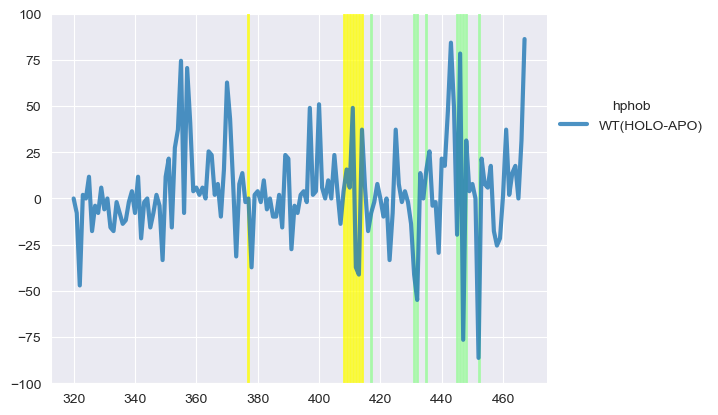

In [50]:

active_site = [377, 408, 409, 410, 411, 412, 413, 414]
allosteric_site = [417,435,431, 432,445,446,447,448,452]
[plt.axvspan(x, x, -100,+100, color="yellow", alpha=.8, lw=2) for x in active_site]
[plt.axvspan(x, x, -100,+100, color="palegreen", alpha=.8, lw=2) for x in allosteric_site]

plt.plot(np.arange(320,468), (np.nansum(piv1, axis=1)+np.nansum(piv1, axis=0))/1, color='tab:blue', alpha=.8, lw=3, label='WT(HOLO-APO)') #-piv3



if typ == 'hbond':
    plt.ylim(-400,400)
else:
    plt.ylim(-100,100)
sns.despine()
plt.legend(bbox_to_anchor=(1,.8), framealpha=False, title=typ)
plt.savefig(f'/Users/federica/Desktop/test_{typ}_interactions_per_res_change.pdf', bbox_inches='tight')

In [57]:
typ = 'hphob'
#resids = np.asarray([377, 408, 409, 410, 411, 412, 413, 414, 417,435,431, 432,445,446,447,448,452,468]).astype(str)
resids = np.arange(320,468).astype(str)
#resids = np.asarray([337, 408, 409, 410, 411, 412, 413, 414]).astype(str)
tmp_WT = pd.DataFrame(columns=['donor_resid', 'acceptor_resid', 'difference'])

for res in resids:
    tmp = pkl['WT']
    tmp = tmp[tmp['type'] == typ]
    x = tmp[(tmp['donor_resid'].str.contains(res))|(tmp['acceptor_resid'].str.contains(res))]
    x = x[['donor_resid', 'acceptor_resid', 'difference']]
    tmp_WT = pd.concat([tmp_WT, x[np.abs(x['difference']) >= 0]])

    tmp_WT.drop_duplicates(inplace=True)


tmp_WT['donor_resid'] = tmp_WT['donor_resid'].astype(str)
tmp_WT['acceptor_resid'] = tmp_WT['acceptor_resid'].astype(str)
tmp_WT['difference'] = tmp_WT['difference'].astype(float)
tmp_WT = tmp_WT.groupby(['donor_resid', 'acceptor_resid']).agg('sum').reset_index()


In [58]:
tmp_WT

,donor_resid,acceptor_resid,difference
0,A:ALA337,A:ASP336,0.000000
1,A:ALA375,A:PRO374,0.000000
2,A:ALA375,A:THR355,5.882353
3,A:ALA390,A:GLU389,17.647059
4,A:ALA390,A:PHE387,1.960784
...,...,...,...
249,A:VAL438,A:TYR435,-1.960784
250,A:VAL466,A:ASN464,3.921569
251,A:VAL466,A:ASP461,11.764706
252,A:VAL466,A:GLY465,0.000000


In [60]:
col = 'difference'
filtered_df = tmp[ (tmp[col].abs() >= 30) ]
filtered_df['donor_idx'] = filtered_df['donor_resid'].apply(lambda x: x[5:8])
filtered_df['acceptor_idx'] = filtered_df['acceptor_resid'].apply(lambda x: x[5:8])
filtered_df = filtered_df.reset_index()
filtered_df = filtered_df[['index', 'donor_idx', 'acceptor_idx', 'donor_resid', 'acceptor_resid', col]]
filtered_df

,index,donor_idx,acceptor_idx,donor_resid,acceptor_resid,difference
0,1447,400,397,A:CYS400,A:ALA397,31.372549
1,1456,381,378,A:GLN381,A:SER378,-31.372549
2,1506,444,443,A:ILE444,A:PRO443,68.627451
3,1519,358,357,A:LEU358,A:HIE357,47.058824
4,1540,371,370,A:LYS371,A:TYR370,45.098039
5,1559,452,451,A:MET452,A:PHE451,-64.705882
6,1560,452,447,A:MET452,A:PRO447,-41.176471
7,1562,330,322,A:PHE330,A:LEU322,-33.333333
8,1573,451,448,A:PHE451,A:ASN448,60.784314
9,1582,443,442,A:PRO443,A:ARG442,49.019608


In [62]:
def filter_rows_by_difference(df, threshold=0.01, col='difference'):
    # Define a function that checks if the difference between any two values in the row is greater than the threshold
    def check_difference(row):
        values = [row[col]]
        for i in range(len(values)):
            for j in range(i + 1, len(values)):
                if abs(values[i] - values[j]) / max(abs(values[i]), abs(values[j])) > threshold:
                    return True
        return False

    # Apply the function to filter rows and return the filtered DataFrame
    return df[df.apply(check_difference, axis=1)]

In [63]:
filtered_df = filtered_df.replace(0.0, np.nan)
filtered_df

,index,donor_idx,acceptor_idx,donor_resid,acceptor_resid,difference
0,1447,400,397,A:CYS400,A:ALA397,31.372549
1,1456,381,378,A:GLN381,A:SER378,-31.372549
2,1506,444,443,A:ILE444,A:PRO443,68.627451
3,1519,358,357,A:LEU358,A:HIE357,47.058824
4,1540,371,370,A:LYS371,A:TYR370,45.098039
5,1559,452,451,A:MET452,A:PHE451,-64.705882
6,1560,452,447,A:MET452,A:PRO447,-41.176471
7,1562,330,322,A:PHE330,A:LEU322,-33.333333
8,1573,451,448,A:PHE451,A:ASN448,60.784314
9,1582,443,442,A:PRO443,A:ARG442,49.019608


In [ ]:
from importlib import reload
import pymol_functions
reload(pymol_functions)
import pymol_functions as pf
reload(pf)
import pandas as pd
breakdown = '/Users/federica/Desktop/combined_delta5.csv'
df = pd.read_csv(breakdown)
df = df[df.columns[0:9]]
df = df.iloc[:-1]
df.to_pickle('/Users/federica/Desktop/combined_delta5.pkl')
breakdown = '/Users/federica/Desktop/combined_delta5.pkl'
pdb = '/Users/federica/Dropbox/PostDoc/Projects/MKP5/PDB/ref.pdb'
pf.draw_interactions(pdb, breakdown, donor='donor', acceptor='acceptor', thickness='Y435A_WT',label='A-WT(apo)', scale=0.15)